<h1>Advanced Customer Segmentation with K-mode Algorithm.<h1>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [18]:
#Load data frame
df = pd.read_csv('Customers.csv')
#Check data
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [19]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [20]:
#Is there any null data
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [21]:
#Income and age (Numeric data) normalization
df_temp = df[['ID', 'Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [22]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [23]:
#Drop ID
df = df.drop(['ID'], axis=1)

In [24]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [25]:
#Change the data types (int to float) due to library
mark_array = df.values
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [27]:
#Buiil our model
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical = [0, 1, 3, 5, 6]) #column of the data
print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 857, ncost: 176.72112327439223
Run: 1, iteration: 2/20, moves: 197, ncost: 176.35578465464343
Run: 1, iteration: 3/20, moves: 14, ncost: 174.55802532882265
Run: 1, iteration: 4/20, moves: 80, ncost: 170.2381695130283
Run: 1, iteration: 5/20, moves: 76, ncost: 167.8228119615516
Run: 1, iteration: 6/20, moves: 60, ncost: 166.24244145057722
Run: 1, iteration: 7/20, moves: 20, ncost: 166.18777183162504
Run: 1, iteration: 8/20, moves: 9, ncost: 166.18082787828564
Run: 1, iteration: 9/20, moves: 2, ncost: 166.18042071435983
Run: 1, iteration: 10/20, moves: 0, ncost: 166.18042071435983
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 798, ncost: 163.13110562456225
Run: 2, iteration: 2/20, moves: 151, ncost: 162.39249654313548
Run: 2, iteration: 3

10

In [28]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

df['cluster'] = cluster_dict
#Put orginal columns from temp to df
df[['ID', 'Age', 'Income']] = df_temp

In [29]:
df[df['cluster'] == 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
2,0,0,49,1,89210,0,0,0,100000003
5,0,0,35,1,144848,0,0,0,100000006
16,0,0,53,1,125550,1,0,0,100000017
22,0,0,48,1,89804,0,0,0,100000023
25,0,0,36,1,71909,0,0,0,100000026
42,0,0,44,1,133658,0,0,0,100000043
46,0,0,39,1,140182,1,0,0,100000047
48,0,0,39,1,130500,0,0,0,100000049
68,0,0,37,1,106978,1,2,0,100000069
71,0,0,46,1,73703,0,0,0,100000072


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


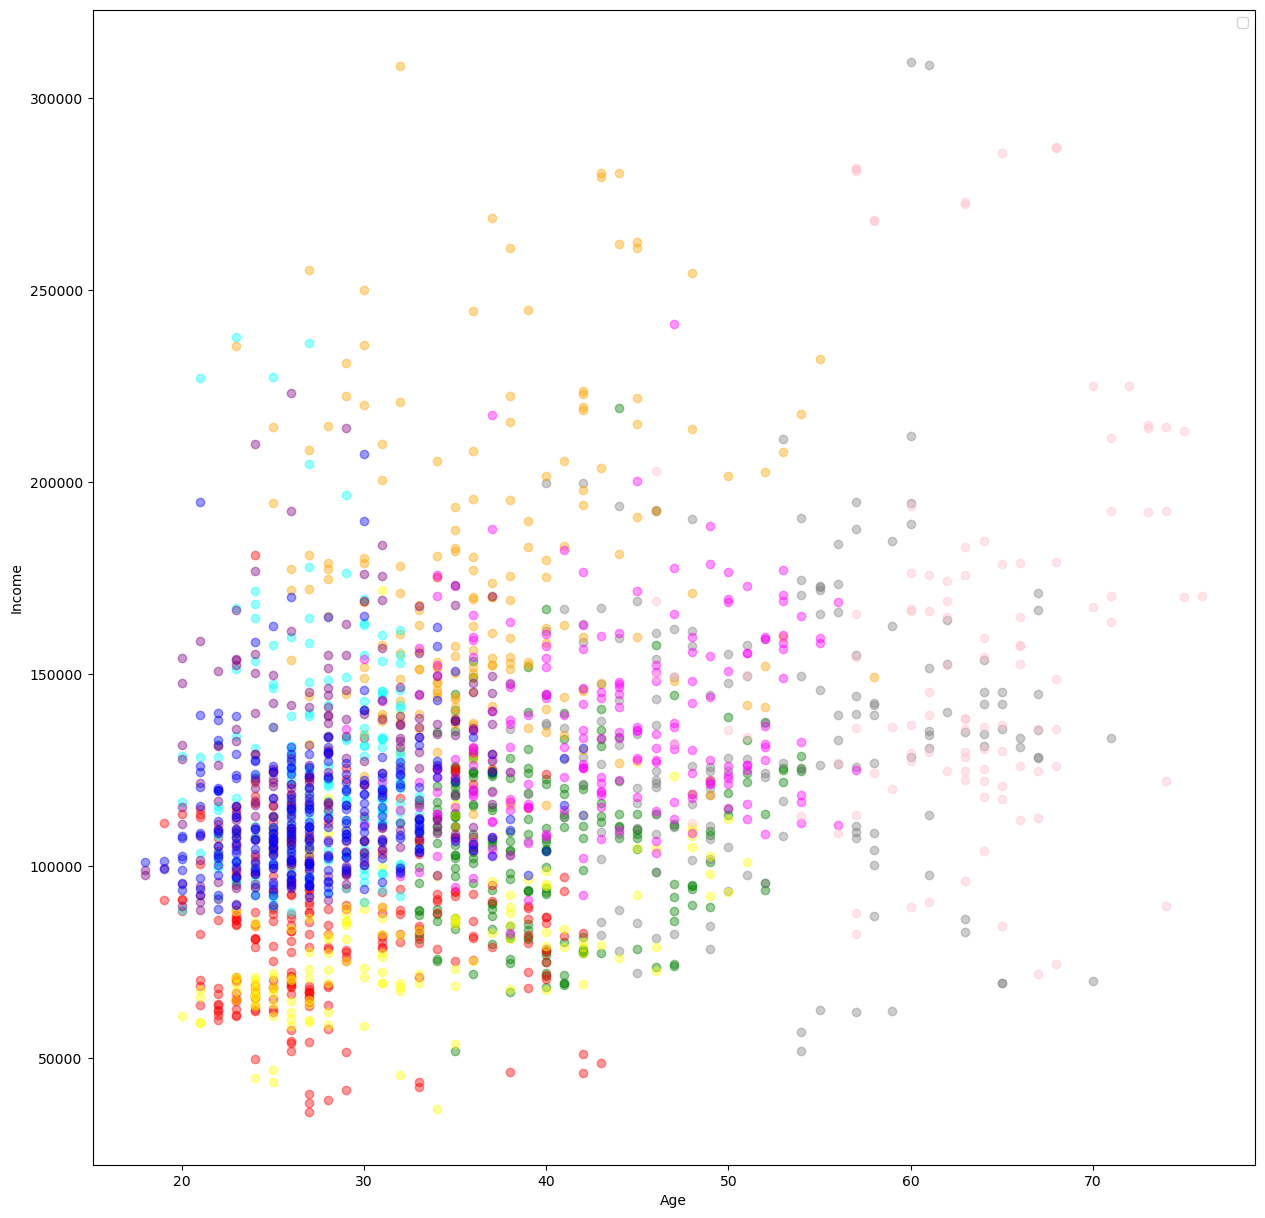

In [30]:
#To illustrate
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 5]
df7 = df[df.cluster == 6]
df8 = df[df.cluster == 7]
df9 = df[df.cluster == 8]
df10 = df[df.cluster == 9]

plt.figure(figsize=(15, 15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'], color='green', alpha=0.4)
plt.scatter(df2.Age, df2['Income'], color='red', alpha=0.4)
plt.scatter(df3.Age, df3['Income'], color='gray', alpha=0.4)
plt.scatter(df4.Age, df4['Income'], color='orange', alpha=0.4)
plt.scatter(df5.Age, df5['Income'], color='yellow', alpha=0.4)
plt.scatter(df6.Age, df6['Income'], color='cyan', alpha=0.4)
plt.scatter(df7.Age, df7['Income'], color='magenta', alpha=0.4)
plt.scatter(df8.Age, df8['Income'], color='pink', alpha=0.4)
plt.scatter(df9.Age, df9['Income'], color='purple', alpha=0.4)
plt.scatter(df10.Age, df10['Income'], color='blue', alpha=0.4)

plt.legend()
plt.show()
